In [12]:

from Mapa import Mapa
from Distancias import Distancias
from Enrutamiento import Enrutamiento
from MapaInteractivo import MapaInteractivo
from Graficar import Graficar

import folium
from IPython.display import display

In [2]:
lugares = [
    "Tibás",
    "Curridabat"
]

print("Lugares seleccionados:", lugares)


Lugares seleccionados: ['Tibás', 'Curridabat']


In [3]:
# Construcción del grafo
mapa = Mapa(lugares)

In [4]:
import osmnx
print("Versión:", osmnx.__version__)
print("Ruta cargada:", osmnx.__file__)


Versión: 1.9.4
Ruta cargada: C:\Users\DELL\.conda\envs\clases\lib\site-packages\osmnx\__init__.py


In [5]:
mapa.mapa()

C:\Users\DELL\Proyecto_Grupal\Entrega\Mapa.py:96: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(top, bottom, left, right, network_type='drive')
C:\Users\DELL\Proyecto_Grupal\Entrega\Mapa.py:96: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(top, bottom, left, right, network_type='drive')


In [7]:
# Matriz de distancias en carretera
dist = Distancias(mapa)

C:\Users\DELL\Proyecto_Grupal\Entrega\Mapa.py:96: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(top, bottom, left, right, network_type='drive')
C:\Users\DELL\Proyecto_Grupal\Entrega\Mapa.py:96: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(top, bottom, left, right, network_type='drive')


In [8]:

matriz_km = dist.distancias()

In [9]:




# Resolver el problema del viajante
ruta = Enrutamiento(matriz_km, depot=0)
solucion = ruta.enrutar()

# Mostrar resultado
ruta_ordenada = [lugares[i] for i in solucion["Ruta"]]
print("Ruta óptima:", " → ".join(ruta_ordenada))
print("Distancia total:", solucion["Recorrido total"])


1
Ruta óptima: Tibás → Curridabat → Tibás
Distancia total: 16 km


In [10]:
# Generar mapa interactivo con Folium
mapa_html = MapaInteractivo(mapa, solucion).crear_mapa_interactivo()
display(mapa_html)


C:\Users\DELL\Proyecto_Grupal\Entrega\Mapa.py:96: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(top, bottom, left, right, network_type='drive')
C:\Users\DELL\Proyecto_Grupal\Entrega\Mapa.py:96: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(top, bottom, left, right, network_type='drive')


C:\Users\DELL\Proyecto_Grupal\Entrega\Mapa.py:96: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(top, bottom, left, right, network_type='drive')
C:\Users\DELL\Proyecto_Grupal\Entrega\Mapa.py:96: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(top, bottom, left, right, network_type='drive')



Tramo 1:
va de Tibás a Curridabat

Tramo 2:
va de Curridabat a Tibás


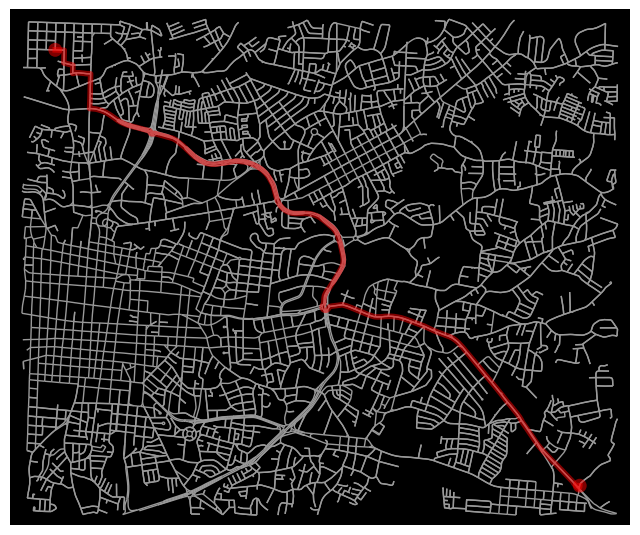

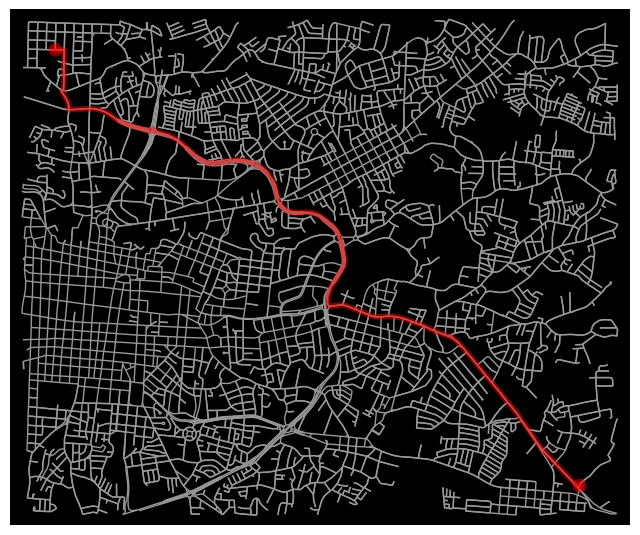

In [15]:
grafo = Graficar(mapa, solucion)

# Mostrar cada tramo
for i in range(1, len(solucion["Ruta"])):
    print(f"\nTramo {i}:")
    fig = grafo.graficar_una(i)
